In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [78]:
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [79]:
## drop unnessecary
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [80]:
 df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [81]:
 df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


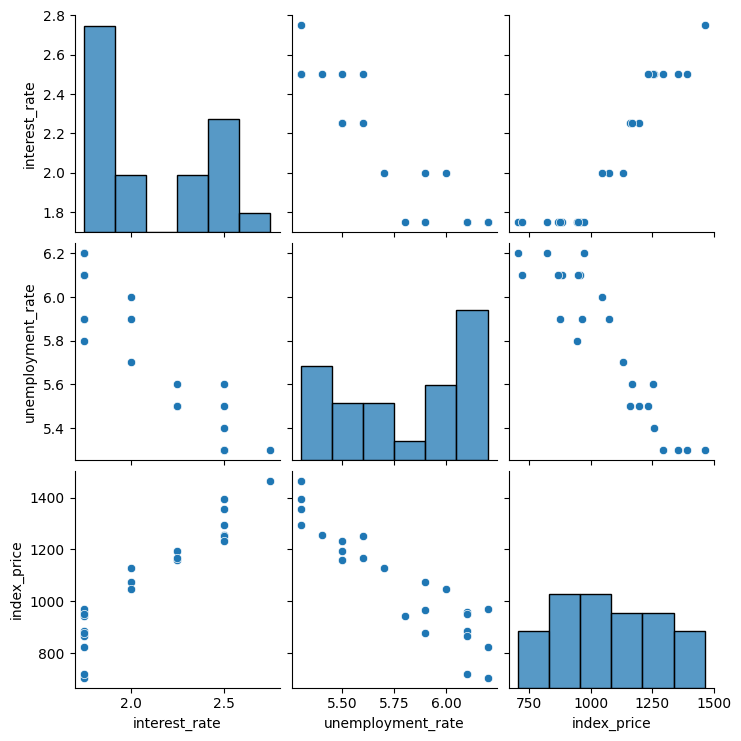

In [82]:
## visualiaztion
import seaborn as sns
sns.pairplot(df)

In [83]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

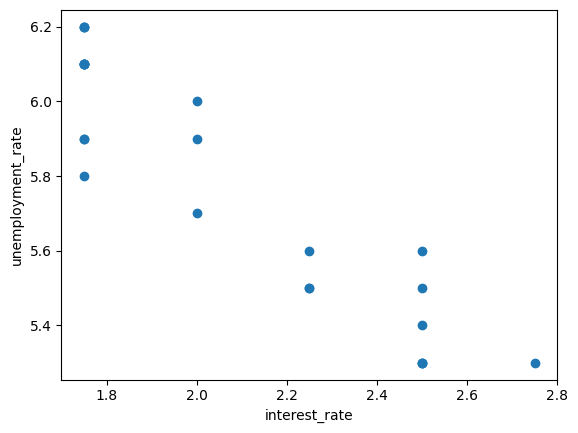

In [84]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [85]:
## independent and dependent feature
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [86]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [87]:
Y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [89]:
X_train

,interest_rate,unemployment_rate
1,2.50,5.3
13,1.75,5.9
23,1.75,6.1
16,1.75,6.2
8,2.25,5.5
6,2.50,5.5
17,1.75,6.1
4,2.50,5.4
2,2.50,5.3
5,2.50,5.6


In [90]:
Y_train

,index_price
1,1394
13,965
23,719
16,971
8,1159
6,1234
17,949
4,1256
2,1357
5,1254


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

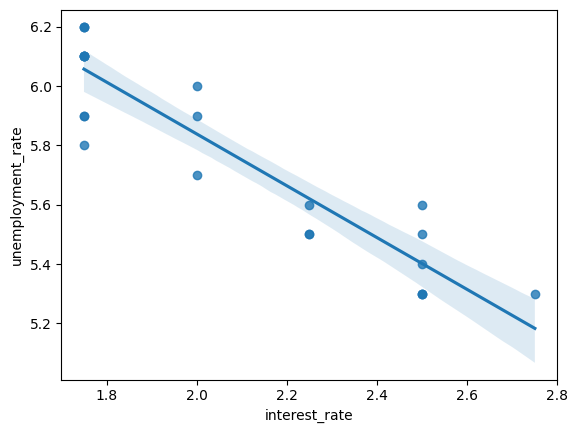

In [91]:
## regplot
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

<Axes: xlabel='interest_rate', ylabel='index_price'>

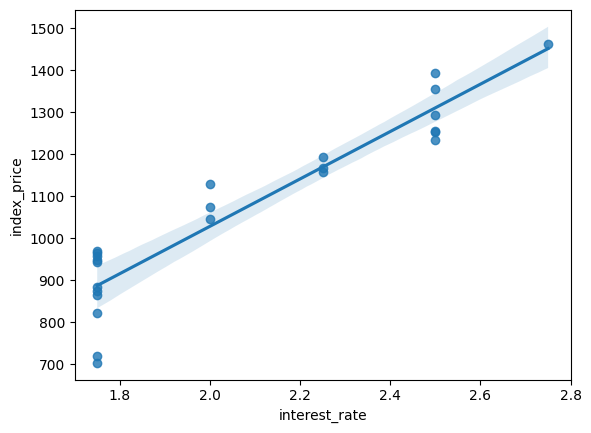

In [92]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

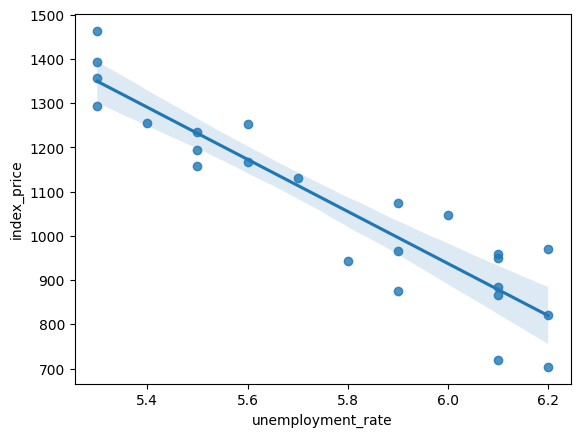

In [93]:
sns.regplot(x='unemployment_rate',y='index_price',data=df)

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.predict(X_test)

array([1023.32247097, 1062.29033293,  872.23516582,  950.17088973,
        930.68695875])

In [96]:
## cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_train,Y_train,scoring='neg_mean_squared_error',cv=5) ##test and validate
np.mean(score)

np.float64(-4222.246542411691)

In [97]:
## performance metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(Y_test,lr.predict(X_test))
mse=mean_squared_error(Y_test,lr.predict(X_test))
mae=mean_absolute_error(Y_test,lr.predict(X_test))
print('r2_score',r2)
print('mse',mse)
print('mae',mae)

r2_score 0.6613091768846912
mse 7720.064431558651
mae 69.89604208095452


In [101]:
## adjusted r2 score
1-(1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


0.3226183537693823

In [98]:
## residuals
residuals=Y_test-lr.predict(X_test)
residuals

,index_price
11,51.677529
10,67.709667
22,-168.235166
14,-7.170890
20,-54.686959


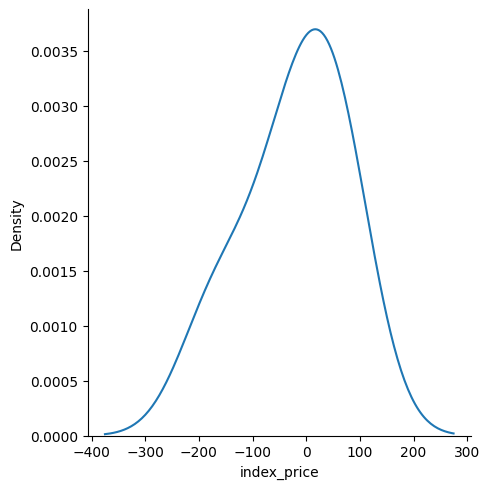

In [99]:
sns.displot(residuals,kind='kde')##->kernal dist estimation

In [102]:
c=lr.coef_
i=lr.intercept_
print('coef',c)
print('intercept',i)

coef [132.27044464 -67.29146667]
intercept 1102.842105263158


In [104]:
#OLS
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     85.73
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           2.82e-09
Time:                        07:03:25   Log-Likelihood:                -104.85
No. Observations:                  19   AIC:                             215.7
Df Residuals:                      16   BIC:                             218.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1102.8421     15.076     73.152      0.000    1070.882    1134.802
x1           132.2704     49.315      2.682      0.016      27.728     236.813
x2           -67.2915     49.315     -1.365      0.191    -171.834      37.251
==============================================================================
Omnibus:                        6.272   Durbin-Watson:                   2.872
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                3.668
Skew:                          -0.872   Prob(JB):                        0.160
Kurtosis:                       4.261   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""